In [2]:
# Cài đặt các thư viện cần thiết
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") # Loại bỏ các cảnh báo
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay,  confusion_matrix

In [3]:
# Khai báo các giá trị tham số
DATA_FILE = 'data_tx2.csv'
RANDOM_STATE = 42      # Dùng trong chia dữ liệu
TEST_SIZE    = 0.25    # Dùng trong chia dữ liệu
K_FOLD       = 3      # Dùng trong đánh giá kiểm định chéo
CV           = 5       # Dùng trong tìm kiếm tham số tốt nhất

In [4]:
# Hàm đọc file
def readFile(dataFile):
  try:
    df = pd.read_csv(dataFile)
    return df
  except FileNotFoundError:
    print(f"Tệp {dataFile} không tồn tại.")
    return None

In [5]:
# In dữ liệu của file
df = readFile(DATA_FILE)
if df is not None:
  print("Dữ liệu ban đầu:")
  print(df.head(10).to_string())

Dữ liệu ban đầu (10 dòng đầu):
     A     B    C     D    E     F    G CLASS
0  9.0  15.0  3.7   2.9  1.2   5.9  4.0     P
1  3.5   4.5  3.1   2.5  2.8  10.0  6.7     N
2  4.1   4.9  2.1   3.7  2.5  10.0  3.3     P
3  4.6   3.5  2.5   2.2  2.7  11.0  7.2     P
4  5.6   1.6  4.1   3.9  4.7   5.6  2.9     N
5  5.7   3.9  2.6   5.8  2.3   4.6  3.6     P
6  8.9   2.5  2.4   3.5  1.6   9.5  2.8     P
7  2.9   3.2  2.9   3.9  3.9  10.6  4.0     P
8  2.2   2.2  3.9  13.4  2.2  11.3  2.9     N
9  6.3   4.1  2.4  12.1  1.8   2.7  4.0     P


In [6]:
# Kiểm tra thông tin dữ liệu

# Kiểm tra dữ liệu có bị khuyết thiếu không
check_nan = df.isna().any().any()
if check_nan == True:
    print("Dữ liệu bị thiếu")
else:
    print("Dữ liệu đầy đủ")

Dữ liệu đầy đủ


CLASS
P    8
N    4
Name: count, dtype: int64


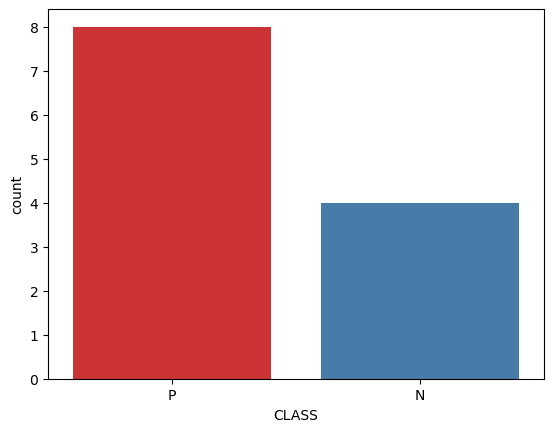

In [7]:
# Kiểm tra tính cân bằng của nhãn
print(df['CLASS'].value_counts())
sns.countplot(data = df, x = df['CLASS'], palette = 'Set1');

In [8]:
# Kiểm tra data bị trùng và xóa nếu có dữ liệu trùng
duplicated_df = df.duplicated().sum()
print("Dữ liệu bị trùng:")
print(duplicated_df)

# Xóa dữ liệu trùng
df = df.drop_duplicates()

Dữ liệu bị trùng:
0


In [9]:
# Tiền xử lý dữ liệu

# Chuyển hóa thuộc tính ký tự sang số
scaler = LabelEncoder()
df['CLASS'] = scaler.fit_transform(df['CLASS'])

# Lấy dữ liệu chuẩn hóa từ dataframe
X = df.iloc[ : , :-1]
Y = df.iloc[ : , -1]

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [10]:
# Chuẩn bị dữ liệu huấn luyện

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size    = TEST_SIZE,
                                                    random_state = RANDOM_STATE)

# Kiểm tra chiều dữ liệu
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("Y_train: ", Y_train.shape)
print("Y_test: ", Y_test.shape)

X_train:  (9, 7)
X_test:  (3, 7)
Y_train:  (9,)
Y_test:  (3,)


In [11]:
# Khởi tạo hàm kiểm định chéo
kf = KFold(n_splits=K_FOLD, shuffle=False)
df_y = np.array(Y)
i = 1
X_train_np = []
X_test_np = []
Y_train_np = []
Y_test_np = []
for train_index, test_index in kf.split(X):
      X_train, X_test = X[train_index], X[test_index]
      Y_train, Y_test = Y[train_index], Y[test_index]
      X_train_np.append(X_train)
      X_test_np.append(X_test)
      Y_train_np.append(Y_train)
      Y_test_np.append(Y_test)



In [12]:
# Xây dựng mô hình xác suất Bayes
from sklearn.naive_bayes import GaussianNB

# Sử dụng mô hình Gauss
accuracies_gauss = []
precisions_gauss = []
recalls_gauss    = []
f1_scores_gauss  = []
train_times_gauss = []


for i in range(K_FOLD):
    X_train, X_test = X_train_np[i], X_test_np[i]
    Y_train, Y_test = Y_train_np[i], Y_test_np[i]
    # Chia dữ liệu thành training và testing


    # Khởi tạo mô hình
    model_gauss = GaussianNB()

    start = time.time()
    # Huấn luyện mô hình
    model_gauss.fit(X_train, Y_train)
    finish = time.time() - start
    print('Thời gian huấn luyện :', finish)

    # Dự đoán mô hình
    y_pred_gauss = model_gauss.predict(X_test)

    # Đưa ra độ chính xác của mô hình
    accuracy_gauss  = accuracy_score(Y_test, y_pred_gauss)
    precision_gauss = precision_score(Y_test, y_pred_gauss)
    recall_gauss    = recall_score(Y_test, y_pred_gauss)
    f1score_gauss   = f1_score(Y_test, y_pred_gauss)


    # In ra kết quả
    print("FOLD:", i)
    print("{:15}: {:>5.4}".format('accuracy', accuracy_gauss))
    print("{:15}: {:>5.4}".format('precision', precision_gauss))
    print("{:15}: {:>5.4}".format('recall', recall_gauss))
    print("{:15}: {:>5.4}".format('f1score', f1score_gauss))
    print("{:15}: {:>5.4}".format('time', finish))

    print("######################################")

    # Append vào các mảng
    accuracies_gauss.append(accuracy_gauss)
    precisions_gauss.append(precision_gauss)
    recalls_gauss.append(recall_gauss)
    f1_scores_gauss.append(f1score_gauss)
    train_times_gauss.append(finish)
    i+=1


# Tính các giá trị trung bình
mean_accuracy_gauss = np.mean(accuracies_gauss)
std_acc_gauss      = np.std(accuracies_gauss)

mean_precision_gauss = np.mean(precisions_gauss)
std_pre_gauss       = np.std(precisions_gauss)

mean_recall_gauss = np.mean(recalls_gauss)
std_rec_gauss       = np.std(recalls_gauss)

mean_f1score_gauss = np.mean(f1_scores_gauss)
std_f1_gauss       = np.std(f1_scores_gauss)

mean_time_gauss = np.mean(train_times_gauss)
std_time_gauss  = np.std(train_times_gauss)

print("{:15}: {:>5.4} ".format('mean_accuracy', mean_accuracy_gauss, std_acc_gauss))
print("{:15}: {:>5.4} ".format('mean_precision', mean_precision_gauss, std_pre_gauss))
print("{:15}: {:>5.4} ".format('mean_recall', mean_recall_gauss, std_rec_gauss))
print("{:15}: {:>5.4} ".format('mean_f1_score', mean_f1score_gauss, std_f1_gauss))
print("{:15}: {:>5.4} ".format('mean_time', mean_time_gauss, std_time_gauss))

Thời gian huấn luyện : 0.0019998550415039062
FOLD: 0
accuracy       :  0.75
precision      :  0.75
recall         :   1.0
f1score        : 0.8571
time           : 0.002
######################################
Thời gian huấn luyện : 0.00106048583984375
FOLD: 1
accuracy       :   0.5
precision      : 0.6667
recall         : 0.6667
f1score        : 0.6667
time           : 0.00106
######################################
Thời gian huấn luyện : 0.0
FOLD: 2
accuracy       :   0.5
precision      :   0.5
recall         :   0.5
f1score        :   0.5
time           :   0.0
######################################
mean_accuracy  : 0.5833 
mean_precision : 0.6389 
mean_recall    : 0.7222 
mean_f1_score  : 0.6746 
mean_time      : 0.00102 


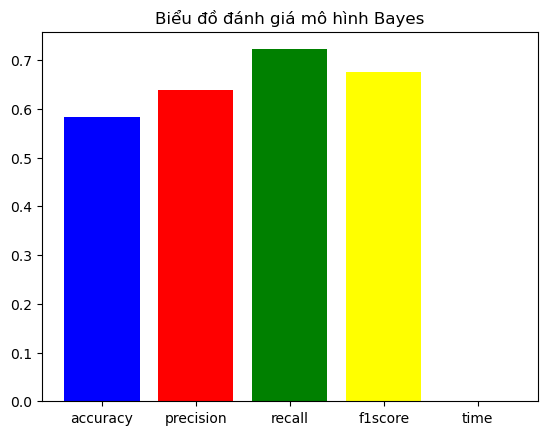

In [13]:
# Vẽ biểu đồ hiển thị các chỉ số đánh giá của mô hình Bayes
Label = ['accuracy', 'precision', 'recall', 'f1score', 'time']
Value = [mean_accuracy_gauss, mean_precision_gauss, mean_recall_gauss, mean_f1score_gauss, mean_time_gauss]
color = ['blue', 'red', 'green', 'yellow', 'orange']
plt.bar(Label, Value, color=color)
plt.title('Biểu đồ đánh giá mô hình Bayes')
plt.show()

In [14]:
# Xây dựng mô hình xác suất SVM
from sklearn.naive_bayes import GaussianNB
# Sử dụng mô hình SVM
accuracies_svm = []
precisions_svm = []
recalls_svm    = []
f1_scores_svm  = []
train_times_svm = []


for i in range(K_FOLD):
  # Chia dữ liệu training và testing
    X_train, X_test = X_train_np[i], X_test_np[i]
    Y_train, Y_test = Y_train_np[i], Y_test_np[i]



    #Khởi tạo mô hình
    model_svm = SVC()

    start = time.time()
    # Huấn luyện mô hình
    model_svm.fit(X_train, Y_train)
    finish = time.time() - start
    print('Thời gian huấn luyện :', finish)

    # Dự đoán mô hình
    y_pred_svm = model_svm.predict(X_test)

    # Đưa ra các độ chính xác của mô hình
    accuracy_svm  = accuracy_score(Y_test, y_pred_svm)
    precision_svm = precision_score(Y_test, y_pred_svm)
    recall_svm    = recall_score(Y_test, y_pred_svm)
    f1score_svm   = f1_score(Y_test, y_pred_svm)


    # In ra kết quả
    print("FOLD:", i)
    print("{:15}: {:>5.4}".format('accuracy', accuracy_svm))
    print("{:15}: {:>5.4}".format('precision', precision_svm))
    print("{:15}: {:>5.4}".format('recall', recall_svm))
    print("{:15}: {:>5.4}".format('f1score', f1score_svm))
    print("{:15}: {:>5.4}".format('time', finish))

    print("######################################")

    # Append vào các mảng
    accuracies_svm.append(accuracy_svm)
    precisions_svm.append(precision_svm)
    recalls_svm.append(recall_svm)
    f1_scores_svm.append(f1score_svm)
    train_times_svm.append(finish)
    i+=1


# Tính các giá trị trung bình
mean_accuracy_svm = np.mean(accuracies_svm)
std_acc_svm      = np.std(accuracies_svm)

mean_precision_svm = np.mean(precisions_svm)
std_pre_svm      = np.std(precisions_svm)

mean_recall_svm = np.mean(recalls_svm)
std_rec_svm       = np.std(recalls_svm)

mean_f1score_svm = np.mean(f1_scores_svm)
std_f1_svm       = np.std(f1_scores_gauss)

mean_time_svm = np.mean(train_times_svm)
std_time_svm  = np.std(train_times_svm)

print("{:15}: {:>5.4} ".format('mean_accuracy', mean_accuracy_svm, std_acc_svm))
print("{:15}: {:>5.4} ".format('mean_precision', mean_precision_svm, std_pre_svm))
print("{:15}: {:>5.4} ".format('mean_recall', mean_recall_svm, std_rec_svm))
print("{:15}: {:>5.4} ".format('mean_f1_score', mean_f1score_svm, std_f1_svm))
print("{:15}: {:>5.4} ".format('mean_time', mean_time_svm, std_time_svm))

Thời gian huấn luyện : 0.031969547271728516
FOLD: 0
accuracy       :  0.75
precision      :  0.75
recall         :   1.0
f1score        : 0.8571
time           : 0.03197
######################################
Thời gian huấn luyện : 0.0010037422180175781
FOLD: 1
accuracy       :  0.75
precision      :  0.75
recall         :   1.0
f1score        : 0.8571
time           : 0.001004
######################################
Thời gian huấn luyện : 0.0
FOLD: 2
accuracy       :   0.5
precision      :   0.5
recall         :   1.0
f1score        : 0.6667
time           :   0.0
######################################
mean_accuracy  : 0.6667 
mean_precision : 0.6667 
mean_recall    :   1.0 
mean_f1_score  : 0.7937 
mean_time      : 0.01099 


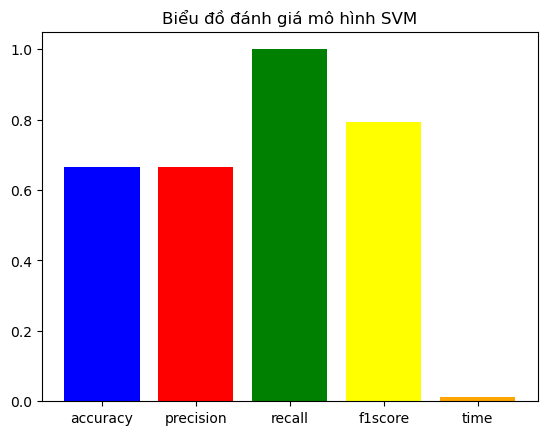

In [15]:
# Vẽ biểu đồ hiển thị các chỉ số đánh giá của mô hình SVM
Label = ['accuracy', 'precision', 'recall', 'f1score', 'time']
Value = [mean_accuracy_svm, mean_precision_svm, mean_recall_svm, mean_f1score_svm, mean_time_svm]
color = ['blue', 'red', 'green', 'yellow', 'orange']
plt.bar(Label, Value, color=color)
plt.title('Biểu đồ đánh giá mô hình SVM')
plt.show()